In [13]:
import numpy as np
import globals as gl
import nibabel as nb
import os
import matplotlib.pyplot as plt

plt.style.use('default')


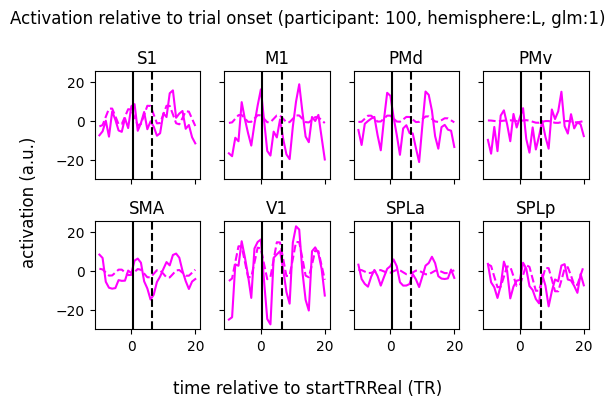

In [37]:
experiment = 'efc4'
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
r = 1
glm = 1
sn = 100
day = 1

g_atlas = nb.load(os.path.join(gl.atlas_dir, f'ROI.32k.{Hem}.label.gii'))

labels = {
    ele.key: getattr(ele, 'label', '')
    for ele in g_atlas.labeltable.labels
}

y_hat = nb.load(os.path.join(gl.baseDir, experiment,  f'{gl.glmDir}{glm}',f'day{day}', f'subj{sn}', f'ROI.y_hat.cut.ptseries.nii'))
y_filt = nb.load(os.path.join(gl.baseDir, experiment, f'{gl.glmDir}{glm}', f'day{day}',f'subj{sn}', f'ROI.y_filt.cut.ptseries.nii'))
y_adj = nb.load(os.path.join(gl.baseDir, experiment, f'{gl.glmDir}{glm}', f'day{day}',f'subj{sn}', f'ROI.y_adj.cut.ptseries.nii'))

fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(6, 4))
for i in range(2):
    for j in range(4):

        axs[i, j].plot(y_adj.header.get_axis(0), y_adj.dataobj[:, r], color='magenta', label='go adj', ls='-')
        axs[i, j].plot(y_hat.header.get_axis(0), y_hat.dataobj[:, r], color='magenta', label='go hat', ls='--')

        axs[i, j].axvline(.5, color='k', ls='-')
        axs[i, j].axvline(6.5, color='k', ls='--')

        axs[i, j].set_title(labels[r])

        r = r + 1

fig.supylabel('activation (a.u.)')
fig.supxlabel('time relative to startTRReal (TR)')
fig.suptitle(f'Activation relative to trial onset (participant: {sn}, hemisphere:{Hem}, glm:{glm})')

fig.tight_layout()